# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

### Q1.
 Clean the data and perform some EDA and visualization to get to know the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/pierce_county_house_sales.csv")  
df.head()


,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [2]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sale_date                    16814 non-null  object
 1   sale_price                   16814 non-null  int64 
 2   house_square_feet            16814 non-null  int64 
 3   attic_finished_square_feet   16814 non-null  int64 
 4   basement_square_feet         16814 non-null  int64 
 5   attached_garage_square_feet  16814 non-null  int64 
 6   detached_garage_square_feet  16814 non-null  int64 
 7   fireplaces                   16814 non-null  int64 
 8   hvac_description             16807 non-null  object
 9   exterior                     16813 non-null  object
 10  interior                     16807 non-null  object
 11  stories                      16814 non-null  int64 
 12  roof_cover                   16806 non-null  object
 13  year_built                   16

In [4]:
df.drop_duplicates(inplace=True)

df.drop(['waterfront_type', 'view_quality'], axis=1, inplace=True)

cat_cols = ['hvac_description', 'exterior', 'interior', 'roof_cover']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/var/folders/3m/rcrg05qd2f3dz2vhh02bdndw0000gp/T/ipykernel_9107/2040800800.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [5]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
df['sale_year'] = df['sale_date'].dt.year
df['sale_month'] = df['sale_date'].dt.month


In [6]:
categorical_cols = ['hvac_description', 'exterior', 'interior', 
                    'roof_cover', 'utility_sewer']
df = df[df['sale_price'] < df['sale_price'].quantile(0.99)]
print(df.isnull().sum())
print(df.info())

sale_date                      0
sale_price                     0
house_square_feet              0
attic_finished_square_feet     0
basement_square_feet           0
attached_garage_square_feet    0
detached_garage_square_feet    0
fireplaces                     0
hvac_description               0
exterior                       0
interior                       0
stories                        0
roof_cover                     0
year_built                     0
bedrooms                       0
bathrooms                      0
utility_sewer                  0
sale_year                      0
sale_month                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 0 to 16813
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sale_date                    16598 non-null  datetime64[ns]
 1   sale_price                   16598 non-null  int64      

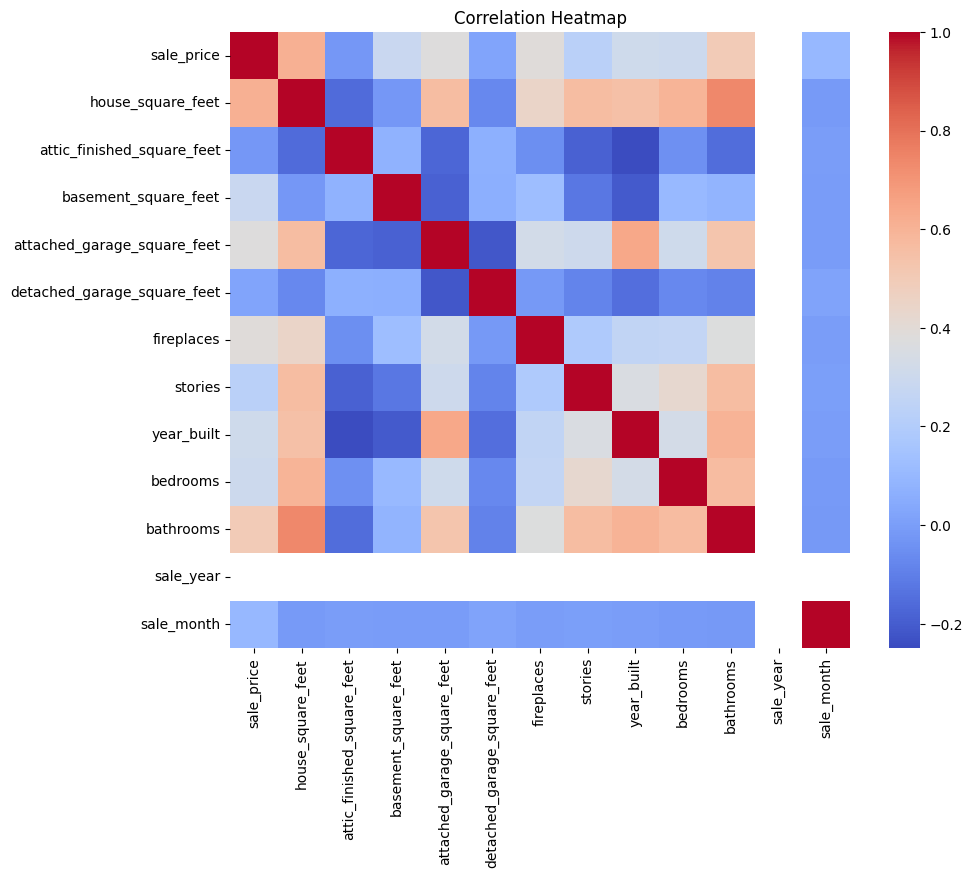

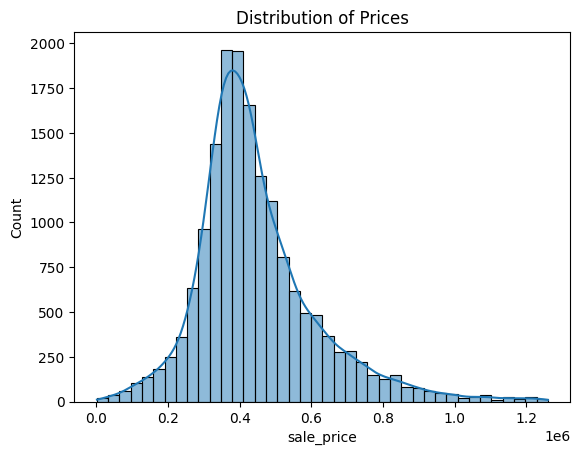

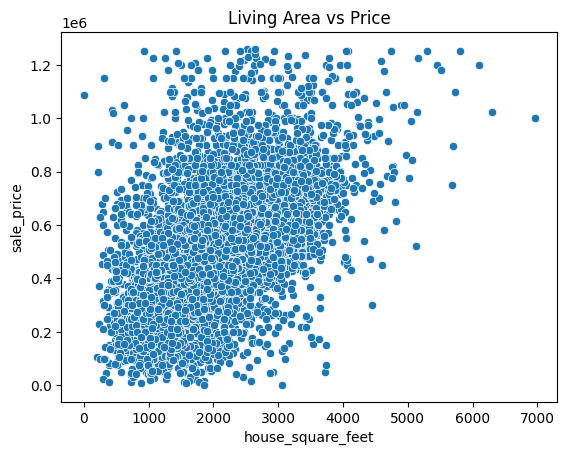

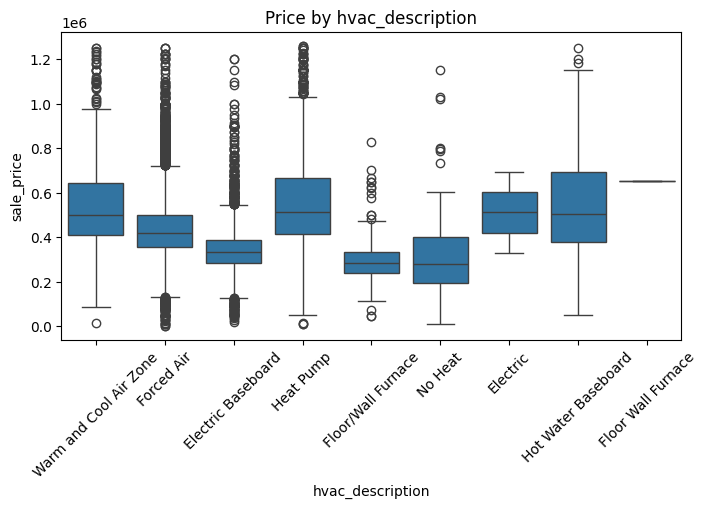

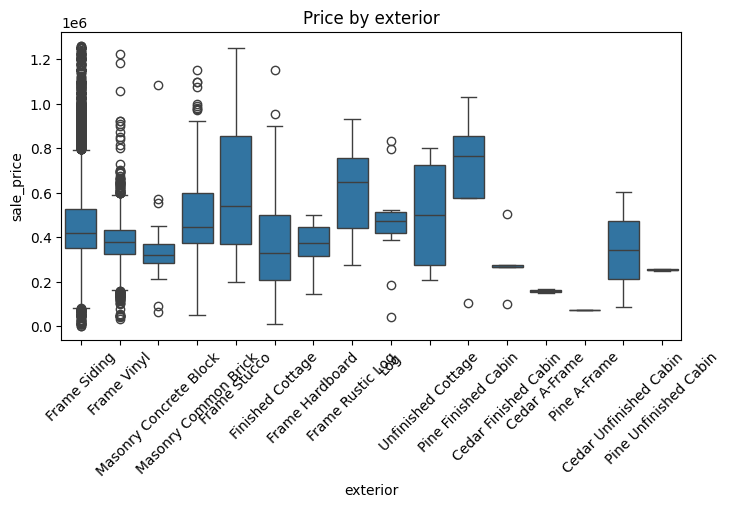

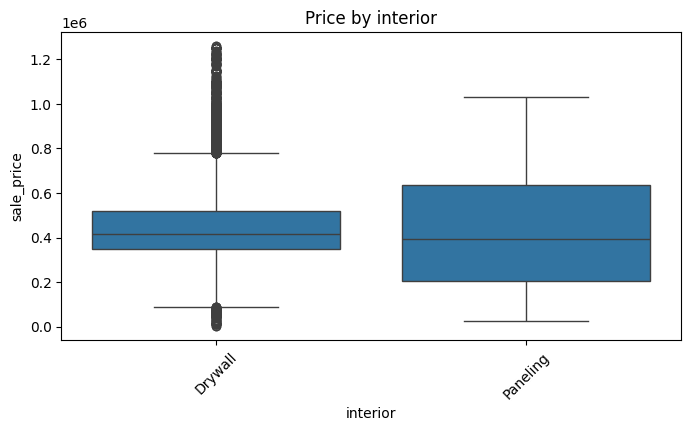

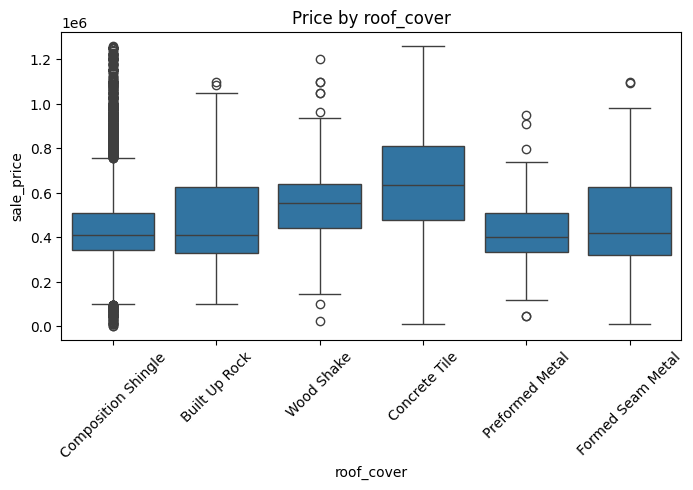

In [9]:
# corr heatmap for numeric
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# price distr
sns.histplot(df['sale_price'], bins=40, kde=True)
plt.title("Distribution of Prices")
plt.show()

# test scatterplot idk if useful
sns.scatterplot(x='house_square_feet', y='sale_price', data=df)
plt.title("Living Area vs Price")
plt.show()

# categorical variables
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='sale_price', data=df)
    plt.title(f'Price by {col}')
    plt.xticks(rotation=45)
    plt.show()


### Q2.
Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())

   sale_date  sale_price  house_square_feet  attic_finished_square_feet  \
0 2020-01-02      380000               2157                           0   
1 2020-01-02      383000               2238                           0   
2 2020-01-01      419900               1452                           0   
3 2020-01-02      251660                832                           0   
4 2020-01-02      500000               1780                           0   

   basement_square_feet  attached_garage_square_feet  \
0                     0                          528   
1                     0                          396   
2                     0                            0   
3                     0                            0   
4                   384                          484   

   detached_garage_square_feet  fireplaces  stories  year_built  ...  \
0                            0           0        2        1993  ...   
1                            0           0        2        2017  ...

### Q3.
Implement an 80/20 train-test split. Put the test data aside.

In [12]:
X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (13278, 46)
Test shape: (3320, 46)
